<a href="https://colab.research.google.com/github/yeahsilver/Vision_Study/blob/main/4_Matrix_Multiplication/4_Matrix_Multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. MLP Matrix Multiplication

### 1. Library Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

### 2. Loading MNIST test dataset

In [2]:
mnist_test = dset.MNIST("", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



### 3. 대략적인 데이터 형태

minist_test 길이:  10000
image data 형태:  torch.Size([1, 28, 28])
label:  7


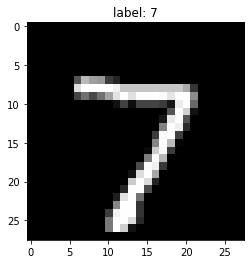

In [3]:
print("minist_test 길이: ", len(mnist_test))

image, label = mnist_test.__getitem__(0)
print("image data 형태: ", image.size())
print("label: ", label)

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap = 'gray')
plt.show()

### 4. sigmoid, softmax 함수 구현

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [5]:
def softmax(x):
  e_x = np.exp(x)
  return e_x / np.sum(e_x)

### 5. 모델 선언

In [6]:
class MyMLP: 
  def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
    self.W1 = np.zeros((n_hidden1, n_input), dtype = np.float32)
    self.b1 = np.zeros((n_hidden1, ), dtype = np.float32)

    self.W2 = np.zeros((n_hidden2, n_hidden1), dtype = np.float32)
    self.b2 = np.zeros((n_hidden2, ), dtype = np.float32)

    self.W3 = np.zeros((n_output, n_hidden2), dtype = np.float32)
    self.b3 = np.zeros((n_output), dtype = np.float32)

    def __call__(self, x):
      x = x.reshape(-1)

      h1 = sigmoid(np.dot(self.W1, x) + self.b1)
      h2 = np.dot(self.W2, h1) + self.b2
      out = np.dot(self.W3, h2) + self.b3

      return softmax(out)

### 6. 모델 생성

In [8]:
model = MyMLP(28 * 28, 256, 128, 10)

In [9]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


### 7. 미리 학습된 weight 로드